## Dimensionality Reduction with PCA

In [82]:
import pandas as pd
import numpy as np
import matplotlib.image as matimg
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from sklearn.decomposition import PCA

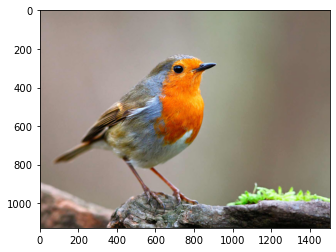

In [83]:
img = matimg.imread('bird_image.jpg')
plt.imshow(img)

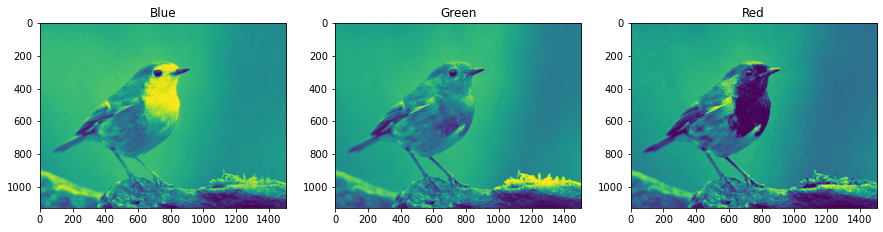

In [84]:
b, g, r = cv2.split(img)

fig = plt.figure(figsize = (15, 8)) 
fig.add_subplot(131)
plt.title("Blue")
plt.imshow(b)

fig.add_subplot(132)
plt.title("Green")
plt.imshow(g)

fig.add_subplot(133)
plt.title("Red")
plt.imshow(r)

In [85]:
blue_df = b/255
red_df = r/255
green_df = g/255

In [86]:
img.shape
pca_b = PCA(n_components=85)
pca_b.fit(blue_df)
trans_pca_b = pca_b.transform(blue_df)

pca_g = PCA(n_components=85)
pca_g.fit(green_df)
trans_pca_g = pca_g.transform(green_df)

pca_r = PCA(n_components=85)
pca_r.fit(red_df)
trans_pca_r = pca_r.transform(red_df)

print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9737858704344041
Green Channel: 0.9737871119235743
Red Channel  : 0.9785305270270936


<BarContainer object of 85 artists>

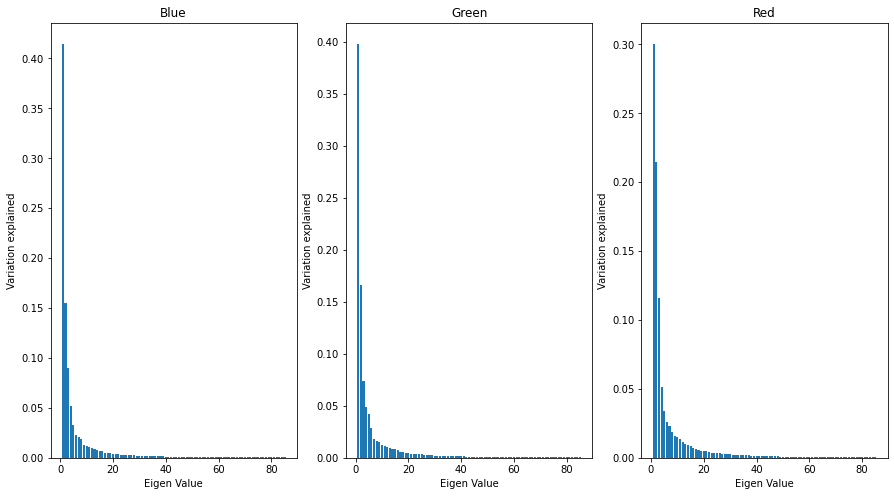

In [87]:
fig = plt.figure(figsize=(15,8))
fig.add_subplot(131)
plt.title('Blue')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,86)), pca_b.explained_variance_ratio_)


fig.add_subplot(132)
plt.title('Green')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,86)), pca_g.explained_variance_ratio_)

fig.add_subplot(133)
plt.title('Red')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,86)), pca_r.explained_variance_ratio_)

In [90]:
blue = pca_b.inverse_transform(trans_pca_b)
green = pca_g.inverse_transform(trans_pca_g)
red = pca_r.inverse_transform(trans_pca_r)

img_reduced = (cv2.merge((blue,green,red)))
print(img_reduced.shape)

(1128, 1504, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


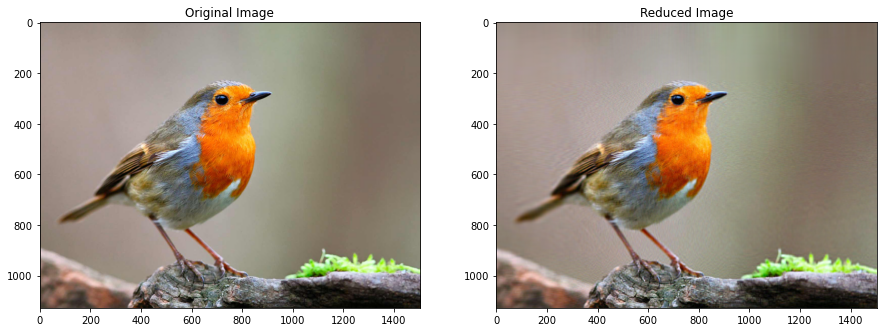

In [91]:
fig = plt.figure(figsize = (15,8))
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)

fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
